# phase 3 

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

In [20]:
# Load data
df = pd.read_csv("../IT326 Project/preprocessed_Diabetes.csv")
print (df.head())

   Diabetes_012  HighBP  HighChol  CholCheck  Smoker  Stroke  \
0             0       1         1          1       1       0   
1             0       0         0          0       1       0   
2             0       1         1          1       0       0   
3             0       1         0          1       0       0   
4             0       1         1          1       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  AnyHealthcare  \
0                     0             0       0        1              1   
1                     0             1       0        0              0   
2                     0             0       1        0              1   
3                     0             1       1        1              1   
4                     0             1       1        1              1   

   NoDocbcCost  GenHlth  DiffWalk  Sex  Age  Education  Discretized_BMI  
0            0        5         1    0    9          4                5  
1            1        3     

In [21]:
# split dataset into features and target variable
fn = df.keys().tolist()[1:]  # df column names without last column 'species'
X = df[fn]  # Features
y = df['Diabetes_012']  # Target variable
print (fn)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Discretized_BMI']


In [33]:


    # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create Decision Tree classifier object
clf = DecisionTreeClassifier()

    # Train Decision Tree classifier
clf = clf.fit(X_train, y_train)

    # Predict the response for the test dataset
y_pred = clf.predict(X_test)

    # Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
    

print("Desired accuracy achieved:", accuracy)

Desired accuracy achieved: 0.46017699115044247


[[18 13 12]
 [13 17  6]
 [11  6 17]]


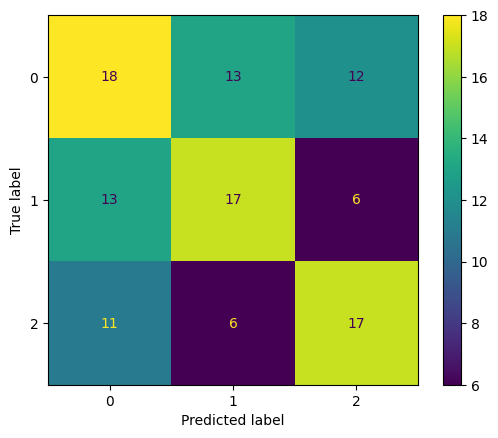

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# Get unique class names
cn = df['Diabetes_012'].unique()

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

In [35]:
from sklearn import tree

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(60, 30), dpi=300, )
tree.plot_tree(clf,feature_names=df.columns[1:],  
               filled=True,fontsize=15);

# You can save your plot if you want
fig.savefig('decision_tree.png')

In [39]:
import pickle

# Save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Load your model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with your model on test dataset
predictions = loaded_model.predict(X_test)
print("Predictions for test dataset:", predictions)

# Make predictions with your model on new dataset
import numpy as np
new_values = np.array([[1,0,0,1,1,1,0,1,0,0,1,2,0,0,9,4,5], [0,0,0,1,0,0,1,0,0,0,1,3,0,0,7,6,1], 
                       [1,0,1,0,0,0,0,1,1,1,0,3,0,1,7,5,1],[1,0,1,0,0,0,1,1,1,1,0,3,0,1,6,6,4],
                       [0,1,1,0,0,0,0,0,1,1,0,4,0,0,11,5,3]])

# Create a pandas DataFrame from the numpy array
new_values_df = pd.DataFrame(new_values, columns=df.columns[1:])
predictions = loaded_model.predict(new_values_df)
print("\nPredictions for the new dataset:",predictions)


Predictions for test dataset: [0 0 0 0 2 1 1 2 0 0 1 1 2 0 0 2 1 1 2 0 2 1 0 1 0 1 2 1 2 2 1 2 0 0 0 0 1
 2 1 1 0 1 1 1 2 0 1 1 0 2 0 0 0 1 2 2 1 0 0 2 0 2 0 0 2 1 2 2 0 0 2 1 2 1
 1 1 1 1 0 0 0 0 2 2 1 2 2 2 2 0 2 0 0 0 1 0 2 0 1 2 0 2 0 0 1 0 2 2 1 1 1
 1 2]

Predictions for the new dataset: [1 0 0 2 1]
